In [ ]:
# ===========================================================
# NOTEBOOK 2 — MODELO GRAPHSAGE (Embeddings por Año)
# Autor: John Jairo Prado Piñeres
# Fecha: 2025
# ===========================================================

In [ ]:
# Importaciones

In [2]:
import os
import torch
import torch.nn as nn
from torch_geometric.nn import SAGEConv, global_mean_pool
from torch_geometric.data import Data

In [ ]:
# RUTAS OFICIALES DEL PROYECTO

In [4]:

ruta_base = r"C:/Users/john/Desktop/Saber_11_2025"

ruta_grafos = os.path.join(ruta_base, "data/5_grafos")
ruta_modelos = os.path.join(ruta_base, "modelos/gnn")
ruta_embeddings = os.path.join(ruta_base, "resultados/embeddings")

os.makedirs(ruta_embeddings, exist_ok=True)

# Años disponibles
anios = list(range(2015, 2022 + 1))

print("Rutas configuradas:")
print(" - Grafos:", ruta_grafos)
print(" - Modelos:", ruta_modelos)
print(" - Embeddings:", ruta_embeddings)

Rutas configuradas:
 - Grafos: C:/Users/john/Desktop/Saber_11_2025\data/5_grafos
 - Modelos: C:/Users/john/Desktop/Saber_11_2025\modelos/gnn
 - Embeddings: C:/Users/john/Desktop/Saber_11_2025\resultados/embeddings


In [ ]:
# **Definir Modelo GraphSAGE**

In [5]:

# MODELO GRAPHSAGE PARA GENERAR EMBEDDINGS POR AÑO

class GraphSAGE(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels=32, out_channels=16):
        super(GraphSAGE, self).__init__()
        self.sage1 = SAGEConv(in_channels, hidden_channels)
        self.sage2 = SAGEConv(hidden_channels, out_channels)
        self.relu = torch.nn.ReLU()

    def forward(self, x, edge_index, batch):
        x = self.relu(self.sage1(x, edge_index))
        x = self.sage2(x, edge_index)
        # Pooling para obtener un embedding por grafo
        x = global_mean_pool(x, batch)
        return x


In [ ]:
# GENERAR EMBEDDINGS PARA CADA AÑO (2015–2022)

In [7]:

embeddings_por_anio = {}

for year in anios:
    print(f"\nProcesando año {year}...")

    # Archivo del grafo
    path = os.path.join(ruta_grafos, f"grafo_{year}_deptos.pt")
    
    if not os.path.exists(path):
        print(f" No se encontró el grafo: {path}")
        continue

    # Cargar el grafo
    g = torch.load(path, weights_only=False)

    x = g.x
    edge_index = g.edge_index

    # Crear batch (todos los nodos pertenecen a un solo grafo)
    batch = torch.zeros(x.shape[0], dtype=torch.long)

    # Crear el modelo GraphSAGE con el número correcto de features
    in_channels = x.shape[1]
    model = GraphSAGE(in_channels=in_channels)

    # Evaluar el grafo (no entrenamos aquí)
    model.eval()
    with torch.no_grad():
        embedding = model(x, edge_index, batch)

    # Guardar embedding (tensor de tamaño [1, 16])
    embeddings_por_anio[year] = embedding.squeeze().numpy()

    print(f" Embedding generado — Dimensiones: {embedding.shape}")



Procesando año 2015...
 Embedding generado — Dimensiones: torch.Size([1, 16])

Procesando año 2016...
 Embedding generado — Dimensiones: torch.Size([1, 16])

Procesando año 2017...
 Embedding generado — Dimensiones: torch.Size([1, 16])

Procesando año 2018...
 Embedding generado — Dimensiones: torch.Size([1, 16])

Procesando año 2019...
 Embedding generado — Dimensiones: torch.Size([1, 16])

Procesando año 2020...
 Embedding generado — Dimensiones: torch.Size([1, 16])

Procesando año 2021...
 Embedding generado — Dimensiones: torch.Size([1, 16])

Procesando año 2022...
 Embedding generado — Dimensiones: torch.Size([1, 16])


In [ ]:
# **Exportar embeddings a CSV y .pt**

In [8]:
# EXPORTAR EMBEDDINGS EN CSV Y ARCHIVO .PT

import pandas as pd
import numpy as np

# Convertir el diccionario a DataFrame
df_embeddings = pd.DataFrame.from_dict(embeddings_por_anio, orient='index')

# Añadir columna "anio"
df_embeddings.index.name = "anio"

# Ordenar por año
df_embeddings = df_embeddings.sort_index()

# Rutas de salida
csv_path = os.path.join(ruta_embeddings, "embeddings_2015_2022.csv")
pt_path  = os.path.join(ruta_embeddings, "embeddings_2015_2022.pt")

# Guardar CSV
df_embeddings.to_csv(csv_path, index=True)

# Guardar archivo .pt
torch.save(embeddings_por_anio, pt_path)

print("Exportación completada:")
print(" - CSV guardado en:", csv_path)
print(" - Archivo .pt guardado en:", pt_path)

df_embeddings
# C:/Users/john/Desktop/Saber_11_2025\resultados/embeddings\embeddings_2015_2022.csv
# Archivo .pt guardado en: C:/Users/john/Desktop/Saber_11_2025\resultados/embeddings\embeddings_2015_2022.pt

Exportación completada:
 - CSV guardado en: C:/Users/john/Desktop/Saber_11_2025\resultados/embeddings\embeddings_2015_2022.csv
 - Archivo .pt guardado en: C:/Users/john/Desktop/Saber_11_2025\resultados/embeddings\embeddings_2015_2022.pt


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
anio,,,,,,,,,,,,,,,,
2015,-0.013285,-0.090360,0.014918,-0.193424,-0.085967,0.108265,0.361620,0.111973,-0.094300,-0.068606,-0.195047,-0.181644,-0.096827,0.127936,-0.013351,-0.161769
2016,-0.195073,0.281308,-0.024735,0.117337,0.042593,-0.216274,-0.048270,-0.019949,-0.045212,-0.292472,-0.254604,0.290325,-0.053898,-0.112172,0.069332,-0.137538
2017,-0.084518,-0.202669,-0.163925,0.034460,0.003330,0.247710,0.005441,-0.120514,-0.071859,0.015435,0.019399,-0.037720,-0.173882,0.048210,0.088221,0.077796
2018,0.111962,-0.017034,0.506638,-0.220439,0.359079,-0.125214,0.166344,-0.070628,0.164679,0.043943,0.401484,-0.114283,0.120481,0.054075,0.678628,-0.328001
2019,0.095019,-0.421412,-0.077540,0.175998,-0.088899,-0.119443,0.002129,-0.127941,-0.104979,0.110968,-0.003392,0.242536,-0.329259,-0.234814,0.208090,-0.141206
2020,-0.105746,0.283967,-0.127792,-0.324531,0.574045,0.039864,-0.261769,-0.301018,0.166300,-0.201020,0.091978,0.212204,0.125527,-0.174737,-0.018771,-0.012808
2021,-0.187736,-0.292265,0.126767,-0.091370,0.128451,0.413479,0.167180,-0.033451,0.202138,-0.000119,-0.000227,0.077904,-0.023739,0.048156,0.303581,-0.029455
2022,-0.054985,-0.073847,-0.193893,-0.129026,0.174212,-0.235259,0.114465,0.144495,-0.121797,-0.070777,-0.202150,-0.009115,0.092984,0.232770,0.080997,0.098271


In [ ]:
# **Visualización de embeddings (PCA, Timeline, Heatmap)**

In [ ]:
# **Embeddings en un plano**

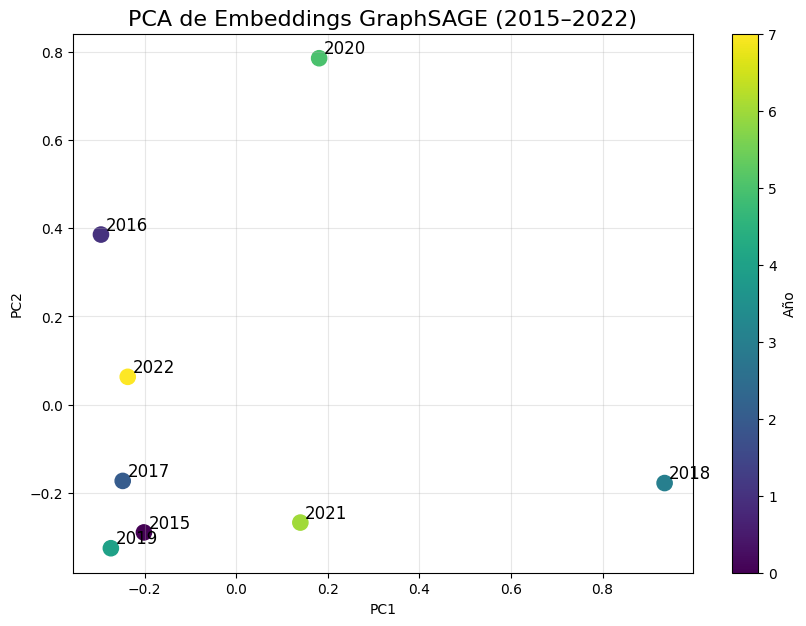

In [9]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Convertir embeddings a matriz ordenada
X = df_embeddings.values
years = df_embeddings.index.values

# PCA a 2 dimensiones
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:,0], X_pca[:,1], c=range(len(years)), cmap="viridis", s=120)

# Etiquetas
for i, year in enumerate(years):
    plt.text(X_pca[i,0] + 0.01, X_pca[i,1] + 0.01, str(year), fontsize=12)

plt.title("PCA de Embeddings GraphSAGE (2015–2022)", fontsize=16)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(alpha=0.3)
plt.colorbar(label="Año")
plt.show()


| Distancia entre años                | Significa                                                                                          |
| ----------------------------------- | -------------------------------------------------------------------------------------------------- |
| **Años muy cercanos**               | La estructura educativa del país fue similar.                                                      |
| **Años separados o alejados**       | Hubo cambios fuertes (socioeconómicos, puntajes, conectividad entre departamentos).                |
| **Cambios abruptos entre dos años** | Puede reflejar eventos importantes (pandemia 2020, reaperturas, cambios de estructura del examen). |


In [ ]:
# **Exportar gráfico PCA por año (imagen individual)**

In [10]:
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Crear carpeta para imágenes
folder_emb = "animacion_embeddings"
os.makedirs(folder_emb, exist_ok=True)

X = df_embeddings.values
years = df_embeddings.index.values

# PCA completo
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Guardar posiciones
posiciones = {year: X_pca[i] for i, year in enumerate(years)}

# Generar imágenes por año
for year in years:
    plt.figure(figsize=(9, 7))

    # Años atenuados
    for y in years:
        if y != year:
            plt.scatter(posiciones[y][0], posiciones[y][1], color="gray", alpha=0.4, s=120)
            plt.text(posiciones[y][0]+0.01, posiciones[y][1]+0.01, str(y), fontsize=10, color="gray")

    # Año actual resaltado
    plt.scatter(posiciones[year][0], posiciones[year][1], color="red", s=220)
    plt.text(posiciones[year][0]+0.01, posiciones[year][1]+0.01, str(year), fontsize=14, color="red")

    plt.title(f"Embedding PCA — Año {year}", fontsize=16)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid(alpha=0.3)

    plt.savefig(f"{folder_emb}/embedding_{year}.png", dpi=150, bbox_inches="tight")
    plt.close()

print("Imágenes de embeddings creadas en: animacion_embeddings/")


Imágenes de embeddings creadas en: animacion_embeddings/


In [ ]:
# **Crear el GIF animado con los embeddings**

In [11]:
from PIL import Image

imagenes = []
for year in years:
    img_path = f"{folder_emb}/embedding_{year}.png"
    imagenes.append(Image.open(img_path))

gif_path = "embedding_pca_2015_2022.gif"

imagenes[0].save(
    gif_path,
    save_all=True,
    append_images=imagenes[1:],
    duration=900,  # 0.9 segundos por frame
    loop=0
)

gif_path


'embedding_pca_2015_2022.gif'

In [ ]:
# **Mover el GIF e imágenes a la carpeta oficial del proyecto**

In [12]:
import shutil

dest = r"C:/Users/john/Desktop/Saber_11_2025/resultados/animaciones"
os.makedirs(dest, exist_ok=True)

shutil.move("embedding_pca_2015_2022.gif", os.path.join(dest, "embedding_pca_2015_2022.gif"))

for year in years:
    shutil.move(f"{folder_emb}/embedding_{year}.png",
                os.path.join(dest, f"embedding_{year}.png"))

print("Embeddings animados movidos correctamente a resultados/animaciones/")


Embeddings animados movidos correctamente a resultados/animaciones/


In [ ]:
# **Versión 3D del PCA animada**

In [13]:
from sklearn.decomposition import PCA
import numpy as np

# Datos
X = df_embeddings.values
years = df_embeddings.index.values

# PCA 3D
pca3 = PCA(n_components=3)
X_3d = pca3.fit_transform(X)

X_3d


array([[-0.20169975, -0.2901279 ,  0.40274355],
       [-0.29553476,  0.38593715, -0.05112277],
       [-0.24802442, -0.17318422, -0.07757737],
       [ 0.93534   , -0.17806321,  0.00367868],
       [-0.2739084 , -0.3259704 , -0.53428483],
       [ 0.1809461 ,  0.78613603, -0.09492431],
       [ 0.13992624, -0.26773706, -0.00638765],
       [-0.23704478,  0.06300933,  0.35787472]], dtype=float32)

In [ ]:
# **Crear imágenes para la animación 3D**

In [14]:
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

folder_3d = "animacion_embeddings_3d"
os.makedirs(folder_3d, exist_ok=True)

# Coordenadas PCA 3D
coords = {year: X_3d[i] for i, year in enumerate(years)}

# Colores degradados
colors = plt.cm.viridis(np.linspace(0, 1, len(years)))

# Generar 120 frames para animación suave
for i in range(120):
    angle = i * 3  # rotación

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Dibujar todos los puntos
    for idx, year in enumerate(years):
        ax.scatter(
            coords[year][0], coords[year][1], coords[year][2],
            s=120, color=colors[idx]
        )
        ax.text(
            coords[year][0], coords[year][1], coords[year][2],
            str(year), fontsize=10
        )

    # Línea temporal conectando años
    ax.plot(
        X_3d[:,0], X_3d[:,1], X_3d[:,2], 
        color="gray", linewidth=2, alpha=0.6
    )

    ax.view_init(elev=20, azim=angle)
    ax.set_title("Embedding PCA 3D — Evolución 2015–2022", fontsize=16)

    plt.savefig(f"{folder_3d}/frame_{i:03d}.png", dpi=120, bbox_inches="tight")
    plt.close()

print("Frames 3D generados en:", folder_3d)


Frames 3D generados en: animacion_embeddings_3d


In [ ]:
# **Convertir frames → GIF animado 3D**

In [15]:
from PIL import Image

frames = []
for i in range(120):
    img = Image.open(f"{folder_3d}/frame_{i:03d}.png")
    frames.append(img)

gif_3d_path = "embedding_pca3d_2015_2022.gif"

frames[0].save(
    gif_3d_path,
    save_all=True,
    append_images=frames[1:],
    duration=90,  # milisegundos (rápido = bonito)
    loop=0
)

gif_3d_path


'embedding_pca3d_2015_2022.gif'

In [ ]:
# **Mover el GIF a la carpeta del proyecto**

In [16]:
import shutil

dest_ani = r"C:/Users/john/Desktop/Saber_11_2025/resultados/animaciones"
os.makedirs(dest_ani, exist_ok=True)

shutil.move(gif_3d_path, os.path.join(dest_ani, "embedding_pca3d_2015_2022.gif"))

print("GIF 3D movido a resultados/animaciones/")


GIF 3D movido a resultados/animaciones/
